### Loading and Preprocessing JSON Data

In this section, we load three JSON files containing cumulative, desktop, and mobile monthly data for rare diseases. The data is then converted into pandas DataFrames for analysis, and the `timestamp` field is transformed into a `datetime` format for easy manipulation.

1. **Loading JSON Data**:
    - The three JSON files are read using the `json` library and stored in `cumulative_data`, `desktop_data`, and `mobile_data`.
    
2. **Converting JSON to DataFrames**:
    - The JSON data is converted into pandas DataFrames (`cumulative_df`, `desktop_df`, and `mobile_df`) for easier manipulation and analysis.

3. **Timestamp Conversion**:
    - The `timestamp` column, which is originally stored as a string in the JSON files, is converted into a `datetime` object using the `pd.to_datetime()` function. This ensures that we can work with the time series data more efficiently.



In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import json

#Load the JSON data
with open('../data/rare-disease_monthly_cumulative_201507-202409.json') as f:
    cumulative_data = json.load(f)

with open('../data/rare-disease_monthly_desktop_201507-202409.json') as f:
    desktop_data = json.load(f)

with open('../data/rare-disease_monthly_mobile_201507-202409.json') as f:
    mobile_data = json.load(f)

#Convert JSON data into DataFrames
cumulative_df = pd.DataFrame(cumulative_data)
desktop_df = pd.DataFrame(desktop_data)
mobile_df = pd.DataFrame(mobile_data)

#Convert timestamps into pandas datetime format
cumulative_df['timestamp'] = pd.to_datetime(cumulative_df['timestamp'], format='%Y%m%d00')
desktop_df['timestamp'] = pd.to_datetime(desktop_df['timestamp'], format='%Y%m%d00')
mobile_df['timestamp'] = pd.to_datetime(mobile_df['timestamp'], format='%Y%m%d00')


### Maximum and Minimum Average Page Views Analysis

In this section, we calculate the **average pageviews** for each article by platform (desktop and mobile) and identify the articles with the **maximum** and **minimum** average pageviews over the entire dataset.

#### Steps:
1. **Group data by article**: We calculate the average number of pageviews for each article, separately for desktop and mobile platforms.
   - `desktop_avg`: Average pageviews for each article on the desktop platform.
   - `mobile_avg`: Average pageviews for each article on the mobile platform.
   
2. **Identify maximum and minimum pageviews**: Using the calculated averages, we determine the articles that have the **highest** and **lowest** average pageviews.
   - `max_desktop_article`: Article with the highest average pageviews on desktop.
   - `min_desktop_article`: Article with the lowest average pageviews on desktop.
   - `max_mobile_article`: Article with the highest average pageviews on mobile.
   - `min_mobile_article`: Article with the lowest average pageviews on mobile.

3. **Filter data for selected articles**: Finally, we filter the original datasets to extract the time series data for these selected articles.
   - `max_desktop`: Time series data for the article with the highest average desktop views.
   - `min_desktop`: Time series data for the article with the lowest average desktop views.
   - `max_mobile`: Time series data for the article with the highest average mobile views.
   - `min_mobile`: Time series data for the article with the lowest average mobile views.
   
This allows us to visualize and analyze the articles with extreme average pageviews for both platforms.


In [83]:
#Group data by article and calculate the average pageviews
desktop_avg = desktop_df.groupby('article_title')['views'].mean()
mobile_avg = mobile_df.groupby('article_title')['views'].mean()

#Find the articles with the maximum and minimum average pageviews
max_desktop_article = desktop_avg.idxmax()
min_desktop_article = desktop_avg.idxmin()

max_mobile_article = mobile_avg.idxmax()
min_mobile_article = mobile_avg.idxmin()

#Filter the data for those articles
max_desktop = desktop_df[desktop_df['article_title'] == max_desktop_article]
min_desktop = desktop_df[desktop_df['article_title'] == min_desktop_article]
max_mobile = mobile_df[mobile_df['article_title'] == max_mobile_article]
min_mobile = mobile_df[mobile_df['article_title'] == min_mobile_article]

### Visualizing Max and Min Average Page Requests Over Time
 
In this section, we plot the maximum and minimum page requests over time for both desktop and mobile platforms. Additionally, we add a zoomed inset for a specific time range (2021-2025) with an arrow indicating the zoomed area on the main plot.

1. **Main Plot**:
    - The primary plot shows the time series of **maximum and minimum average page requests** for both desktop and mobile platforms.
    - The lines represent:
      - **Max Desktop**: Highest average page requests on desktop, plotted in blue.
      - **Min Desktop**: Lowest average page requests on desktop, plotted in cyan.
      - **Max Mobile**: Highest average page requests on mobile, plotted in green.
      - **Min Mobile**: Lowest average page requests on mobile, plotted in red.
    - Labels and titles are added to the x-axis (Time), y-axis (Views), and the overall plot for clarity.
    - A legend is included to differentiate between the lines, and gridlines are added for better readability.

2. **Zoomed Inset Plot**:
    - A zoomed inset plot is created at the middle-right of the main plot to provide a closer look at the data for the period **2021-2025**.
    - The inset shows the same **min desktop** (cyan) and **min mobile** (red) data, but zoomed in on the specific time range.
    - The zoomed plot has set x and y limits (`xlim` from 2021 to 2025, `ylim` from -1 to 50) and gridlines for clarity. The x and y ticks are removed to avoid clutter.

3. **Arrow Annotation**:
    - An arrow is added to visually connect the zoomed area in the inset to the corresponding section in the main plot.
    - The arrow originates from the inset and points to the relevant part of the main plot where the data is zoomed in.
    - The arrow is colored **purple** (`facecolor='purple'`) and styled with a narrow line width (`lw=0.1`).

4. **Saving the Plot**:
    - The figure is saved as `'zoomed_in_to_main_plot_arrow.png'` for later use.


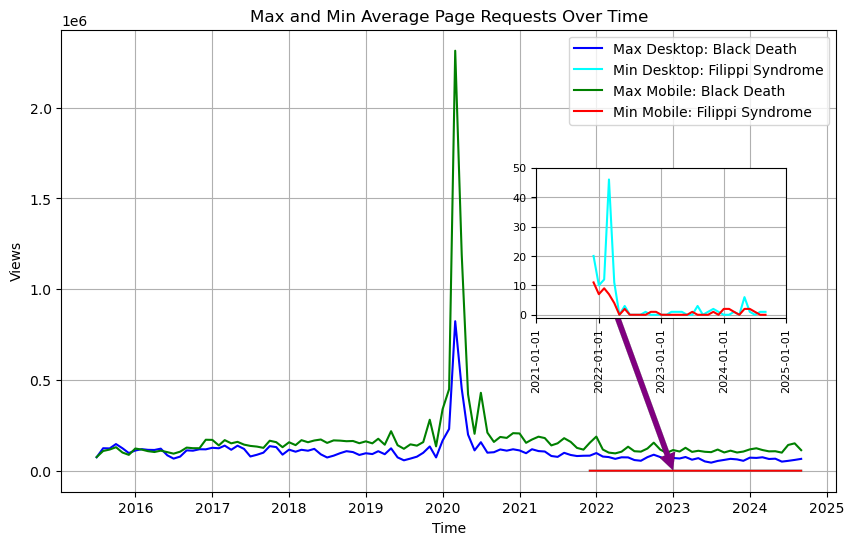

In [82]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

#Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

#Plot the main data on ax1 (primary plot)
ax1.plot(max_desktop['timestamp'], max_desktop['views'], label=f'Max Desktop: {max_desktop_article}', color='blue')
ax1.plot(min_desktop['timestamp'], min_desktop['views'], label=f'Min Desktop: {min_desktop_article}', color='cyan')
ax1.plot(max_mobile['timestamp'], max_mobile['views'], label=f'Max Mobile: {max_mobile_article}', color='green')
ax1.plot(min_mobile['timestamp'], min_mobile['views'], label=f'Min Mobile: {min_mobile_article}', color='red')

#Main plot labels and title
ax1.set_title('Max and Min Average Page Requests Over Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Views')
ax1.legend()
ax1.grid(True)

#Create an inset (zoomed-in plot) at the right middle of the main plot
ax2 = fig.add_axes([0.6, 0.4, 0.25, 0.25])

#Plot the data in the inset plot (zoomed in from 2021 to 2025)
ax2.plot(min_desktop['timestamp'], min_desktop['views'], label=f'Min Desktop: {min_desktop_article}', color='cyan')
ax2.plot(min_mobile['timestamp'], min_mobile['views'], label=f'Min Mobile: {min_mobile_article}', color='red')

#Set limits for the zoomed inset
ax2.set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2025-01-01'))
ax2.set_ylim(-1, 50)

#Add small scales (ticks) on both axes without overlap
ax2.xaxis.set_tick_params(labelsize=8)  # smaller x-axis labels
ax2.yaxis.set_tick_params(labelsize=8)  # smaller y-axis labels
ax2.grid(True)

#Set x-axis ticks in a way that won't clutter the plot
ax2.set_xticks(pd.date_range('2021-01-01', '2025-01-01', freq='YS'))  # Yearly ticks
ax2.set_yticks([0, 10, 20, 30, 40, 50])  # Set smaller range of y-ticks

#Rotate x-axis labels vertically
plt.setp(ax2.get_xticklabels(), rotation=90)

#Annotate arrow from main plot to inset plot
ax1.annotate('', xy=(pd.Timestamp('2023-01-01'), 1000), xytext=(0.68, 0.55),
             textcoords='axes fraction', arrowprops=dict(facecolor='purple', shrink=0.001, lw=0.1))

#Save the plot
plt.savefig('../images/Max and Min Average Page Requests Over Time.png')
plt.show()


### Visualizing Top 10 Peak Page Views (Desktop & Mobile)

In this section, we identify and visualize the top 10 peak page views for both desktop and mobile platforms. The plot shows how these peak articles performed over time, comparing their page views.

1. **Identifying Top 10 Peak Page Views**:
    - The code groups the data by article title and computes the **maximum page views** for each article.
    - For both **desktop** and **mobile** platforms, the articles with the top 10 highest peak page views are selected using `nlargest(10)`.

2. **Filtering Data for Top 10 Articles**:
    - Once the top 10 articles with the highest peak page views are identified, the dataset is filtered to include only these articles for further analysis.
    - Two datasets are created: one for **desktop top 10 articles** and one for **mobile top 10 articles**.

3. **Plotting the Top 10 Peak Articles**:
    - The plot shows the time series of page views for the top 10 articles on both platforms:
      - **Desktop**: Plotted with dashed lines (`linestyle='--'`), representing the performance of the top 10 articles with the highest peak views.
      - **Mobile**: Plotted with solid lines, showing the performance of the corresponding top 10 mobile articles.
    - Each line is labeled with the article title, allowing for direct comparison between desktop and mobile performance.
    - The x-axis represents the **time**, and the y-axis shows the **page views** for each article.
    
4. **Adding Legends, Title, and Grid**:
    - The legend is included to differentiate between articles on desktop and mobile platforms.
    - A grid is added to make the time series data easier to read and compare.
    - The plot is titled **"Top 10 Peak Page Views Over Time (Desktop & Mobile)"**, and the axes are labeled appropriately.

5. **Saving the Plot**:
    - The plot is saved as `'top_10_peak_views.png'` for future reference and presentation.


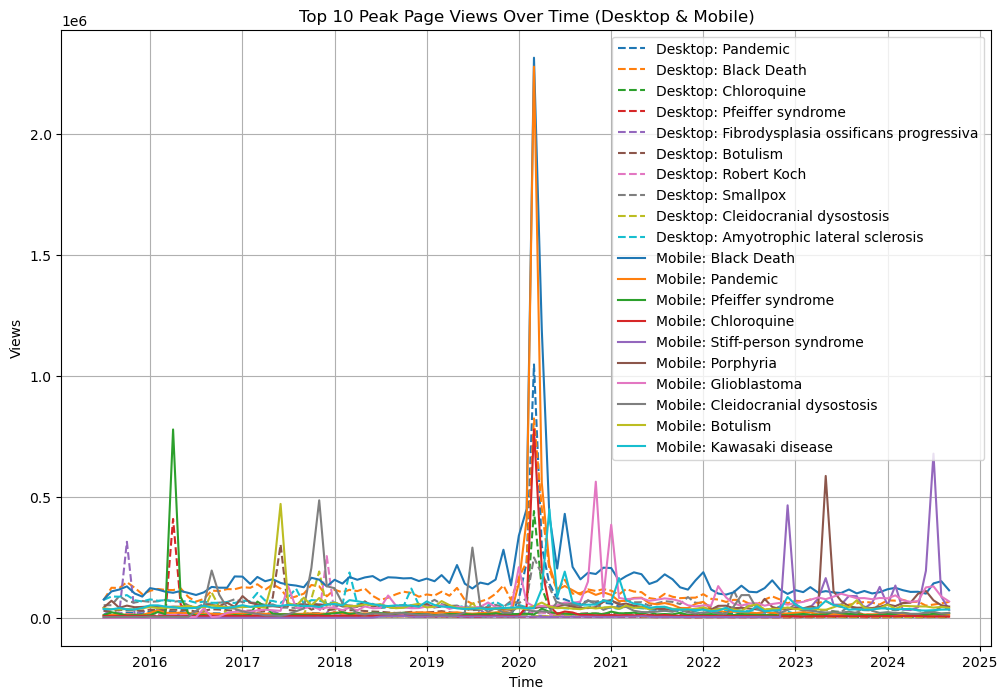

In [71]:
#Find the peak views for each article
desktop_peak = desktop_df.groupby('article_title')['views'].max().nlargest(10)
mobile_peak = mobile_df.groupby('article_title')['views'].max().nlargest(10)

#Filter the data for these top 10 peak articles
desktop_top_10 = desktop_df[desktop_df['article_title'].isin(desktop_peak.index)]
mobile_top_10 = mobile_df[mobile_df['article_title'].isin(mobile_peak.index)]

#Plot top 10 peak page views for desktop and mobile
plt.figure(figsize=(12, 8))

for article in desktop_peak.index:
    article_data = desktop_top_10[desktop_top_10['article_title'] == article]
    plt.plot(article_data['timestamp'], article_data['views'], label=f'Desktop: {article}', linestyle='--')

for article in mobile_peak.index:
    article_data = mobile_top_10[mobile_top_10['article_title'] == article]
    plt.plot(article_data['timestamp'], article_data['views'], label=f'Mobile: {article}')

plt.title('Top 10 Peak Page Views Over Time (Desktop & Mobile)')
plt.xlabel('Time')
plt.ylabel('Views')
plt.legend()
plt.grid(True)
plt.savefig('../images/Top 10 Peak Page Views Over Time (Desktop and Mobile).png')
plt.show()


### Visualizing Articles with the Fewest Months of Data (Desktop & Mobile)

In this section, we identify the articles that have data for the fewest months on both desktop and mobile platforms. We then visualize the page views for these articles over time to compare their performance.

1. **Counting the Number of Months Available**:
    - The data is grouped by article title, and the number of months (i.e., `timestamp` entries) for each article is counted.
    - The **top 10 articles** with the fewest months of data are selected for both desktop and mobile platforms using `nsmallest(10)`.

2. **Filtering Data for the Fewest Months Articles**:
    - After identifying the articles with the fewest months of data, the dataset is filtered to include only these articles for both desktop and mobile platforms.
    - Two separate datasets are created: one for **desktop articles** with the fewest months and one for **mobile articles**.

3. **Plotting the Fewest Months Articles**:
    - The plot shows the time series of **page views** for the top 10 articles with the fewest months of data:
      - **Desktop** articles are plotted with dashed lines (`linestyle='--'`).
      - **Mobile** articles are plotted with solid lines.
    - The x-axis represents the **time**, and the y-axis represents the **number of views**.
    - This visualization helps highlight articles that have relatively little data over time and can reveal potential gaps in data collection.

4. **Legend Positioning**:
    - The legend is placed below the plot using the `bbox_to_anchor` parameter to ensure it doesn't overlap with the plot itself.
    - The legend is organized into **two columns** (`ncol=2`) for better readability.

5. **Saving the Plot**:
    - The plot is saved as `'fewest_months_data_with_legend_below.png'`, making it available for future reference and presentations.


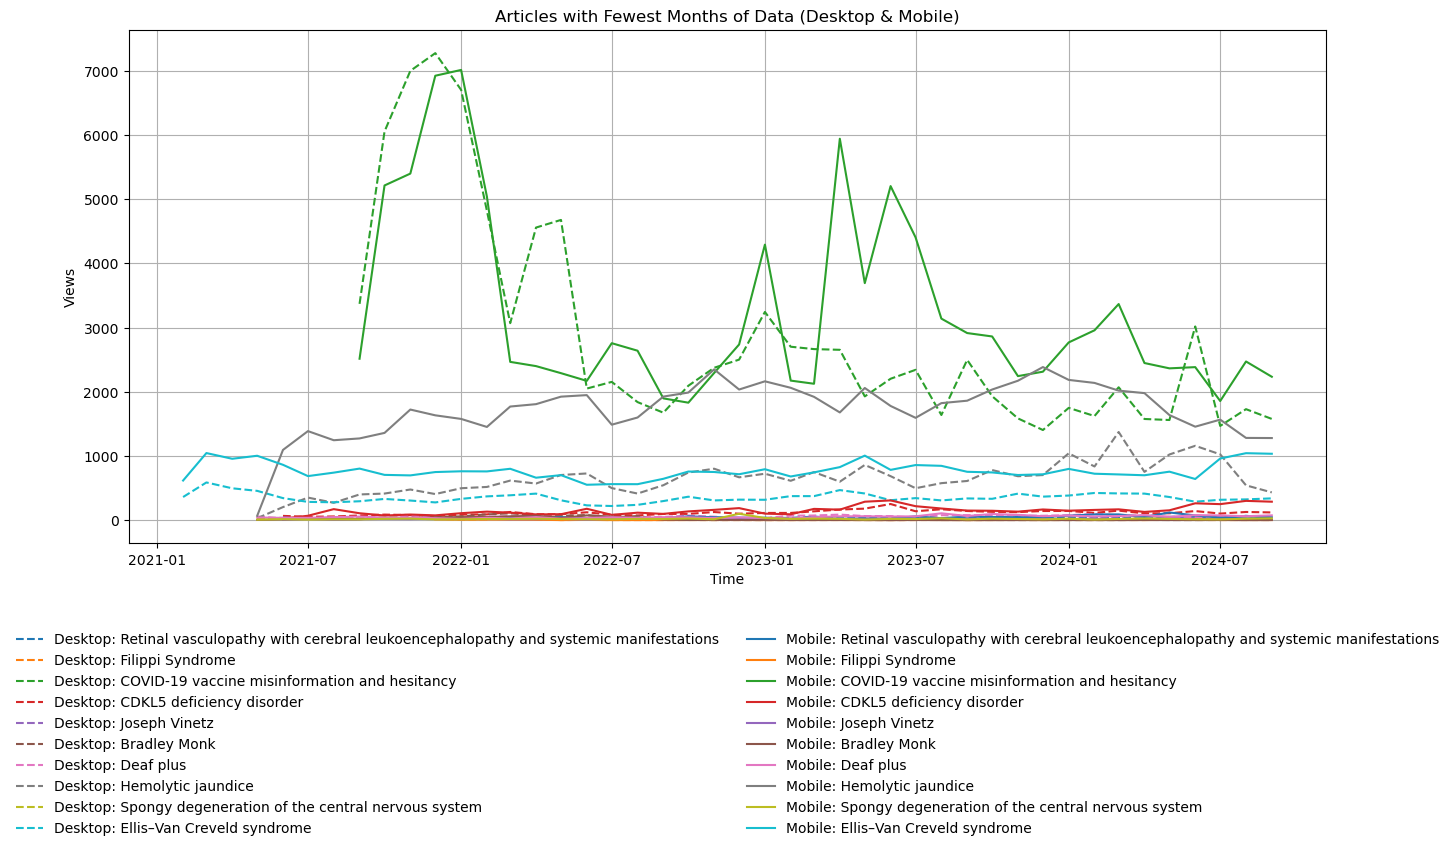

In [73]:
#Count the number of months available for each article
desktop_months_count = desktop_df.groupby('article_title')['timestamp'].count().nsmallest(10)
mobile_months_count = mobile_df.groupby('article_title')['timestamp'].count().nsmallest(10)

#Filter the data for these articles
desktop_fewest_10 = desktop_df[desktop_df['article_title'].isin(desktop_months_count.index)]
mobile_fewest_10 = mobile_df[mobile_df['article_title'].isin(mobile_months_count.index)]

#Plot the fewest months of data for desktop and mobile
plt.figure(figsize=(15, 10))

for article in desktop_months_count.index:
    article_data = desktop_fewest_10[desktop_fewest_10['article_title'] == article]
    plt.plot(article_data['timestamp'], article_data['views'], label=f'Desktop: {article}', linestyle='--')

for article in mobile_months_count.index:
    article_data = mobile_fewest_10[mobile_fewest_10['article_title'] == article]
    plt.plot(article_data['timestamp'], article_data['views'], label=f'Mobile: {article}')

#Set title, labels, and grid
plt.title('Articles with Fewest Months of Data (Desktop & Mobile)')
plt.xlabel('Time')
plt.ylabel('Views')
plt.grid(True)

#Adjust the legend position to below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)

#Adjust the layout to make space for the legend below the plot
plt.tight_layout(rect=[0, 0.1, 1, 1])

#Save the figure
plt.savefig('../images/Articles with Fewest Months of Data (Desktop and Mobile).png', bbox_inches='tight')
plt.show()
